# Центральная предельная теорема своими руками

## Бета-распределение

Про распределение можно почитать [тут](https://ru.wikipedia.org/wiki/Бета-распределение).

$E[x]=\frac{\alpha}{\alpha+\beta}$, $D[x]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$,

где $\alpha,\beta>0$ - произвольные фиксированные параметры

Вычислим E[x] и D[x] для заданных $\alpha$ и $\beta$:

In [1]:
a,b=2,1
E = a/(a+b)
D = (a*b)/(((a+b)**2)*(a+b+1))

Импортируем необходимые библиотеки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Сгенерируем выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

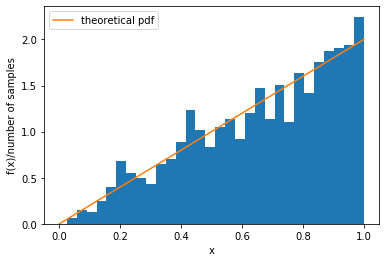

In [3]:
beta = sts.beta(a, b)
x = np.linspace(0,1,1000)
plt.hist(beta.rvs(size=1000),density = True, bins=30)
plt.plot(x, beta.pdf(x), label='theoretical pdf')
plt.ylabel('f(x)/number of samples')
plt.xlabel('x')
plt.legend()

# Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

### при n = 5

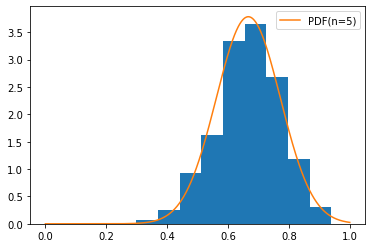

In [4]:
sample5=[]#массив выборочных средних
for i in range(1000):
    zn = beta.rvs(size=5)
    summa = sum(zn)/5
    sample5.append(summa)

x = np.linspace(0,1,1000)#определяем массив точек для построения плотности распределения
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=5

sigma5=math.sqrt(D/5) #сигма для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5) #определяем нормальное распределение
pdf5 = norm5.pdf(x) #получаем плотность распределения

#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.hist(sample5, density=True)
plt.plot(x, pdf5, label='PDF(n=5)')
plt.legend(loc='best')

### при n = 10

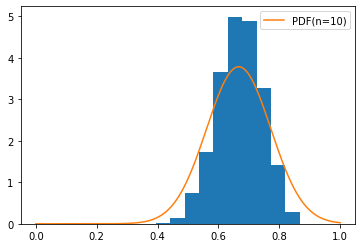

In [5]:
sample10=[]#массив выборочных средних
for i in range(1000):
    zn = beta.rvs(size=10)
    summa = sum(zn)/10
    sample10.append(summa)

x = np.linspace(0,1,1000)#определяем массив точек для построения плотности распределения
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=10

sigma10=math.sqrt(D/10) #сигма для нормального распределения выборки средних
norm10 = sts.norm(E, sigma10) #определяем нормальное распределение
pdf10 = norm5.pdf(x) #получаем плотность распределения

#строим гистограмму массива средних при n=10 и плотность описывающую этот массив нормального распределения
plt.hist(sample10, density=True)
plt.plot(x, pdf5, label='PDF(n=10)')
plt.legend(loc='best')

### при n = 50

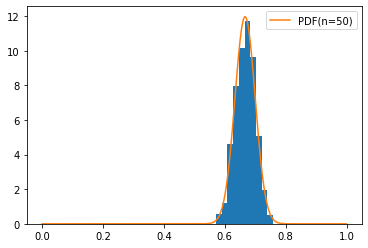

In [6]:
sample50=[]#массив выборочных средних
for i in range(1000):
    zn = beta.rvs(size=50)
    summa = sum(zn)/50
    sample50.append(summa)

x = np.linspace(0,1,1000)#определяем массив точек для построения плотности распределения
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=50

sigma50=math.sqrt(D/50) #сигма для нормального распределения выборки средних
norm50 = sts.norm(E, sigma50) #определяем нормальное распределение
pdf50 = norm50.pdf(x) #получаем плотность распределения

#строим гистограмму массива средних при n=50 и плотность описывающую этот массив нормального распределения
plt.hist(sample50, density=True)
plt.plot(x, pdf50, label='PDF(n=50)')
plt.legend(loc='best')

### при n = 1000

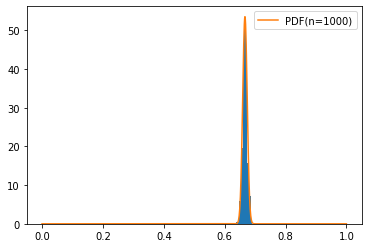

In [7]:
sample1000=[]#массив выборочных средних
for i in range(1000):
    zn = beta.rvs(size=1000)
    summa = sum(zn)/1000
    sample1000.append(summa)

x = np.linspace(0,1,1000)#определяем массив точек для построения плотности распределения
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=1000

sigma1000=math.sqrt(D/1000) #сигма для нормального распределения выборки средних
norm1000 = sts.norm(E, sigma1000) #определяем нормальное распределение
pdf1000 = norm1000.pdf(x) #получаем плотность распределения

#строим гистограмму массива средних при n=1000 и плотность описывающую этот массив нормального распределения
plt.hist(sample1000, density=True)
plt.plot(x, pdf1000, label='PDF(n=1000)')
plt.legend(loc='best')

# ВЫВОД

Исходя из 4 экспериментов со значением n мы видим, что с увеличением n, объема выборки, увеличивается точность апроксимации среднего значения непрерывной случайной величины, о чем и говорит нам ЦПТ. Более качественный результат наблюдается при больших n, в нашем случае при n = 1000.